In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "C:/Users/kaur6/Downloads/Urban Analytics/Odometer Data/illinois_2023/vin_mpg_with_all.csv"  # Change path as needed
df = pd.read_csv(file_path)

# Drop 'vin' column as it's just an identifier
df = df.drop(columns=['vin'])

# Remove rows where combination_mpg contains 'No data found'
df = df[df['combination_mpg'] != 'No data found']

# Convert combination_mpg to numeric
df['combination_mpg'] = pd.to_numeric(df['combination_mpg'])

# Separate numerical and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns.drop(['test date', 'purchase date'], errors='ignore')

In [ ]:
print(df['combination_mpg'].describe())

count    473.000000
mean      20.672304
std        7.166336
min       11.000000
25%       17.000000
50%       20.000000
75%       23.000000
max      136.000000
Name: combination_mpg, dtype: float64


In [ ]:
correlation = df.corr(numeric_only=True)['combination_mpg'].sort_values(ascending=False)
print(correlation)

combination_mpg    1.000000
my                 0.117740
zipcode            0.069485
odometer          -0.081873
Name: combination_mpg, dtype: float64


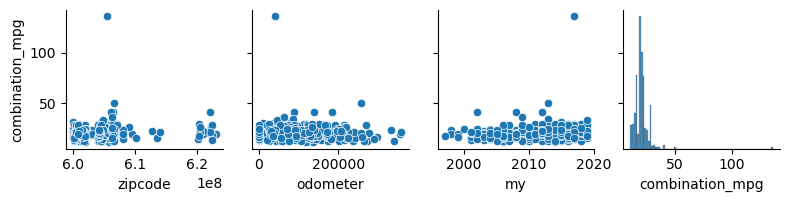

In [ ]:
sns.pairplot(df, y_vars=['combination_mpg'], height=2)
plt.show()

The combination_mpg values range between 11 and 136, with an average of 20.67 MPG.

The majority of the data falls between 17 and 23 MPG (interquartile range).

There is a significant outlier with an MPG value of 136, which may represent a hybrid or electric vehicle.

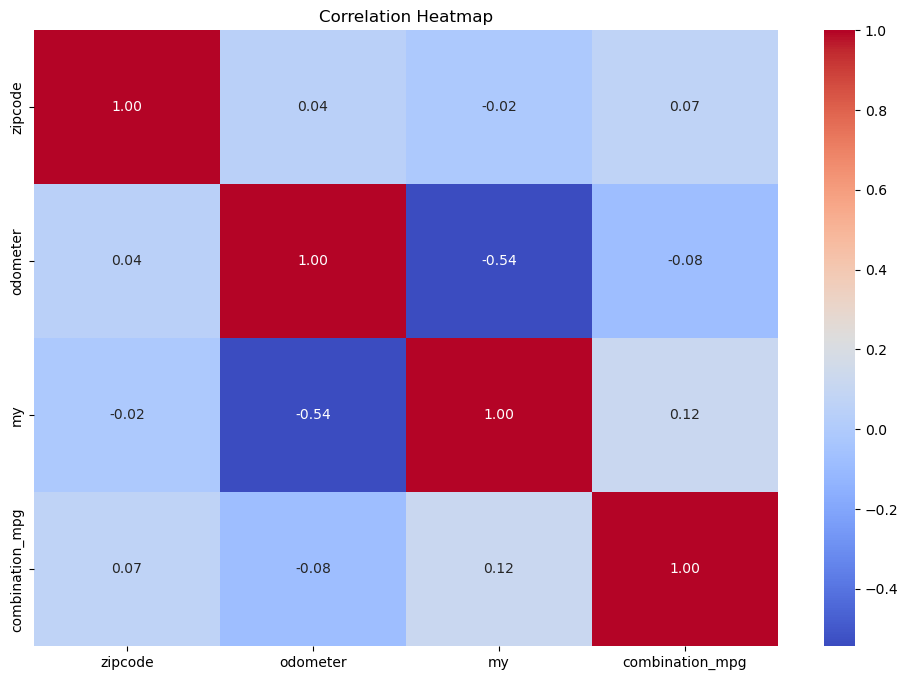

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

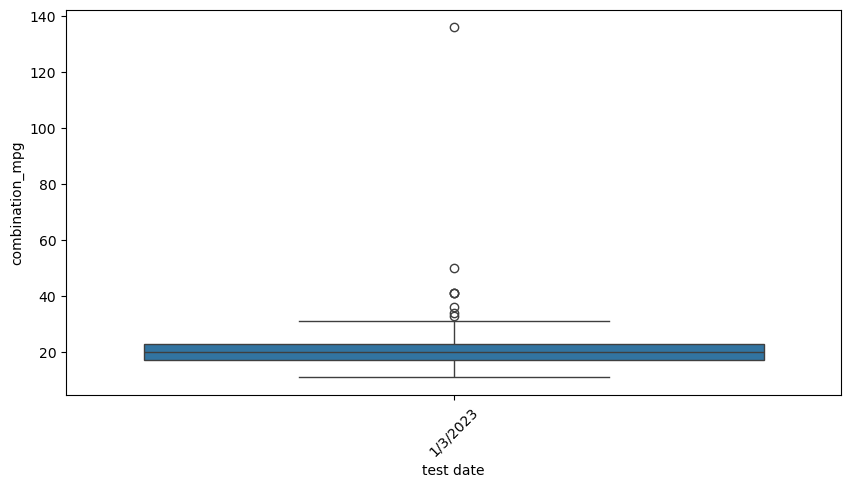

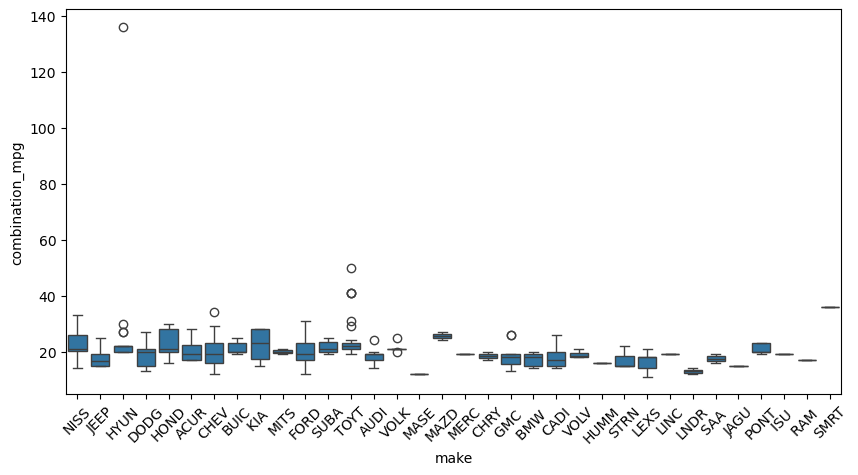

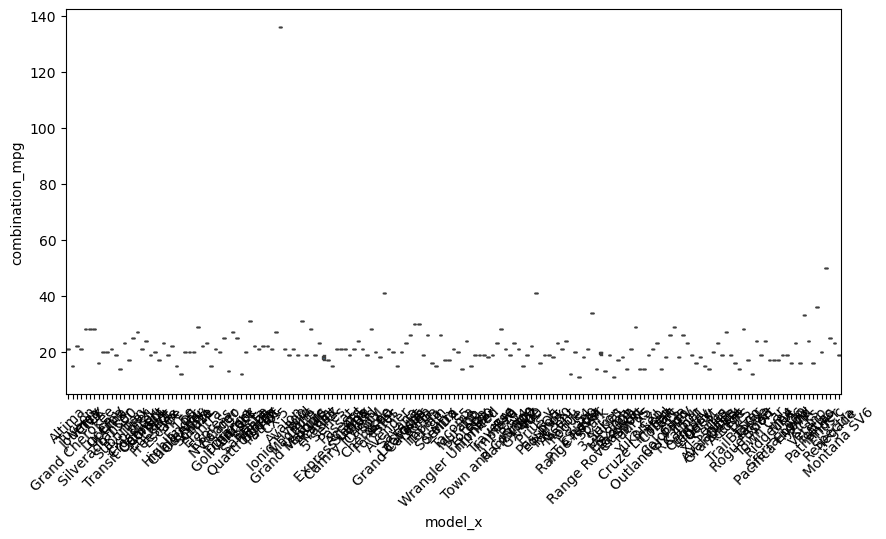

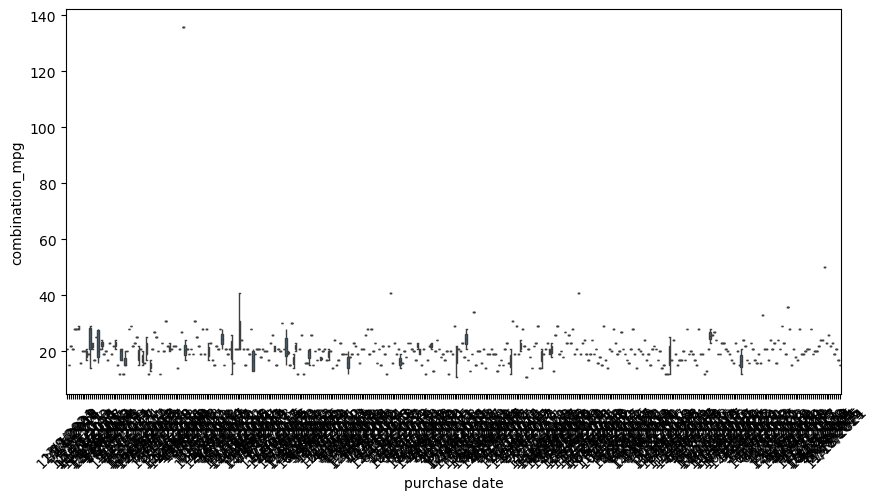

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col, y='combination_mpg')
    plt.xticks(rotation=45)
    plt.show()

The correlation values are all weak, meaning no single numerical variable is a strong predictor of fuel efficiency.

While newer cars may be more fuel-efficient, the relationship is not strong enough to draw definitive conclusions.

Higher mileage vehicles tend to have lower combination_mpg, which aligns with expected mechanical wear and efficiency loss over time.

The scatter plots of combination_mpg against numerical features do not reveal strong linear relationships.

The data distribution appears widely spread with no clear trend in most cases.

There may be clusters or categorical dependencies that affect fuel efficiency more than numeric trends.

##Final Conclusion

*   The dataset does not show strong numerical predictors for combination_mpg, indicating that fuel efficiency is influenced by categorical or external factors.
*   Higher mileage vehicles may have lower fuel efficiency, but the correlation is weak.
*   Vehicle model year shows a slight positive correlation, which aligns with technological improvements in fuel efficiency over time.
*   The strongest insights may come from analyzing categorical attributes such as vehicle type, fuel type, and transmission, which could better explain variations in fuel efficiency

In [ ]:
'''
import pandas as pd

# Load datasets
file1 = "C:/Users/kaur6/Downloads/Urban Analytics/Odometer Data/illinois_2023/merged_dataset.csv"  # Replace with your actual file name
file2 = "C:/Users/kaur6/Downloads/Urban Analytics/Odometer Data/illinois_2023/vin_to_mpg_latest.csv"  # Replace with your actual file name

df1 = pd.read_csv(file1)  # First dataset containing VIN and other details
df2 = pd.read_csv(file2)  # Second dataset containing VIN and mpg values

# Select only the first 500 rows of dataset1
df1_subset = df1.iloc[:500]  # Extract first 500 rows

# Merge only these first 500 rows with df2 on 'VIN'
merged_df = pd.merge(df1_subset, df2, on="vin", how="inner")

# Save the merged dataset
merged_df.to_csv("C:/Users/kaur6/Downloads/Urban Analytics/Odometer Data/illinois_2023/good_dataset.csv", index=False)

print("Merged file saved as 'good_dataset.csv'")
'''